### K Means Clustering 

#### STEP 1 - DATA PREPROCESSING

##### Current Directory

In [1]:
import os
os.getcwd()

'C:\\Users\\gaura\\OneDrive\\Desktop\\Anaconda\\Practicals\\Home\\Machine Learning\\Machine Learning A-Z New\\Part 4 - Clustering\\Section 24 - K-Means Clustering'

##### Import Directories

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

##### Import Dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Dropping Unwanted Columns

dataset.drop(columns='CustomerID', axis=1, inplace=True)

In [9]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


##### Finding Corrrelation

(3.0, 0.0)

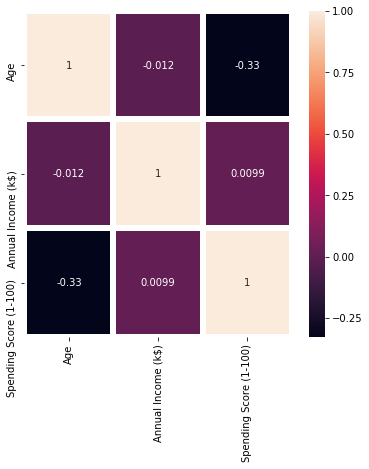

In [10]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(data=dataset.corr(), linewidths=5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

##### Checking Missing Values

In [11]:
dataset.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

---

#### STEP 2 - DATA VISUALIZATION

##### Gender

Female    112
Male       88
Name: Genre, dtype: int64


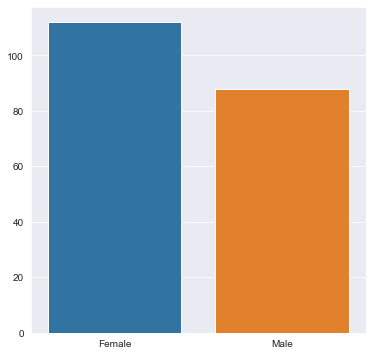

In [12]:
#Visualizing Gender

gender = dataset.Genre.value_counts()
print(dataset.Genre.value_counts())

sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
sns.barplot(x = gender.index, y = gender.values)
plt.show()

By looking at the above the graph we can clearly see that the female population clearly outweighs the male counterpart.

##### Age 

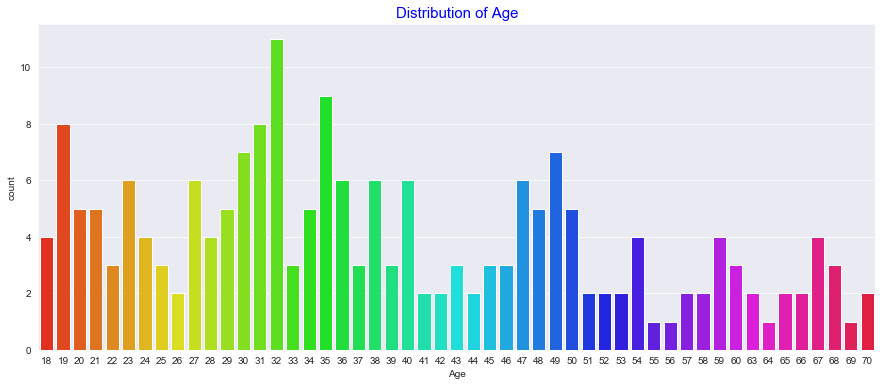

In [13]:
#Visualizing Age 

plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(dataset.Age, palette='hsv')
plt.title('Distribution of Age', fontsize = 15, color='Blue')
plt.show()

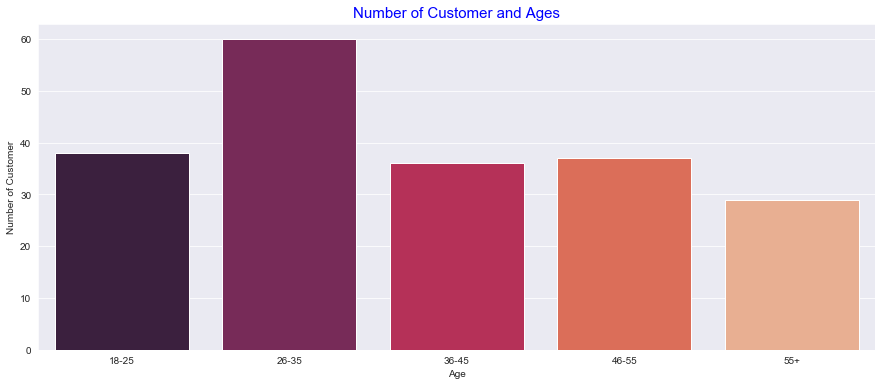

In [14]:
age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages", fontsize = 15, color='Blue')
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

By looking at the above graph we can clearly see a bar plot to check the distribution of number of customers in each age group. Clearly the 26–35 age group outweighs every other age group.

##### Spending Score (1-100)

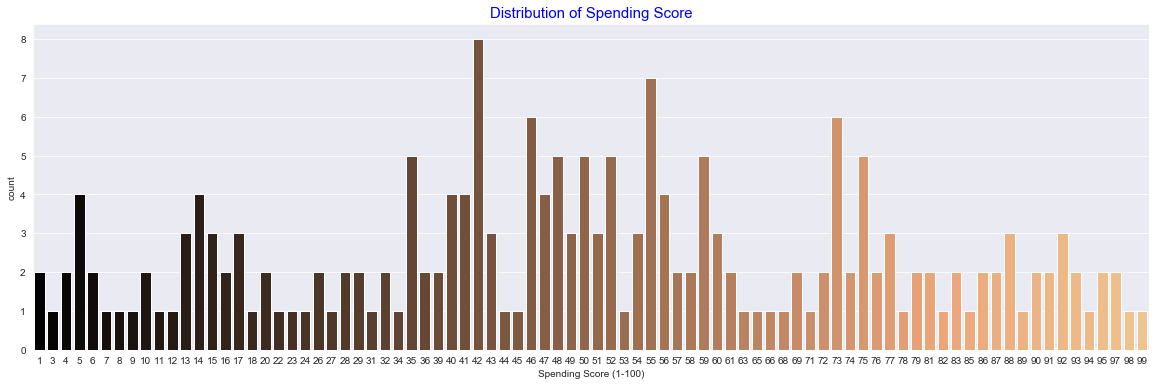

In [18]:
#Visualizing Spending Score 

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.countplot(dataset['Spending Score (1-100)'], palette='copper')
plt.title('Distribution of Spending Score', fontsize = 15, color='Blue')
plt.show()

This is the most important chart in the perspective of mall, as it is very important to have some intuition and idea about the spending score of the customers visiting the mall.

On a general level, we may conclude that most of the customers have their spending score in the range of 35-60. There are customers also having 1 spending score and 99 spending score as well which shows that the mall caters to the variety of customers with varying needs and requirements available in the mall.

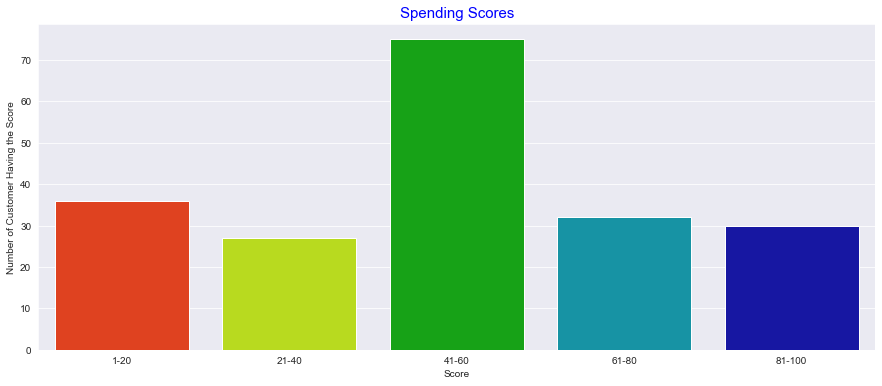

In [19]:
ss1_20   = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss21_40  = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss41_60  = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss61_80  = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores", fontsize = 15, color='Blue')
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Above graph represents the number of customers according to their spending scores. The majority of the customers have spending score are in the range of 41–60.

##### Annual Income

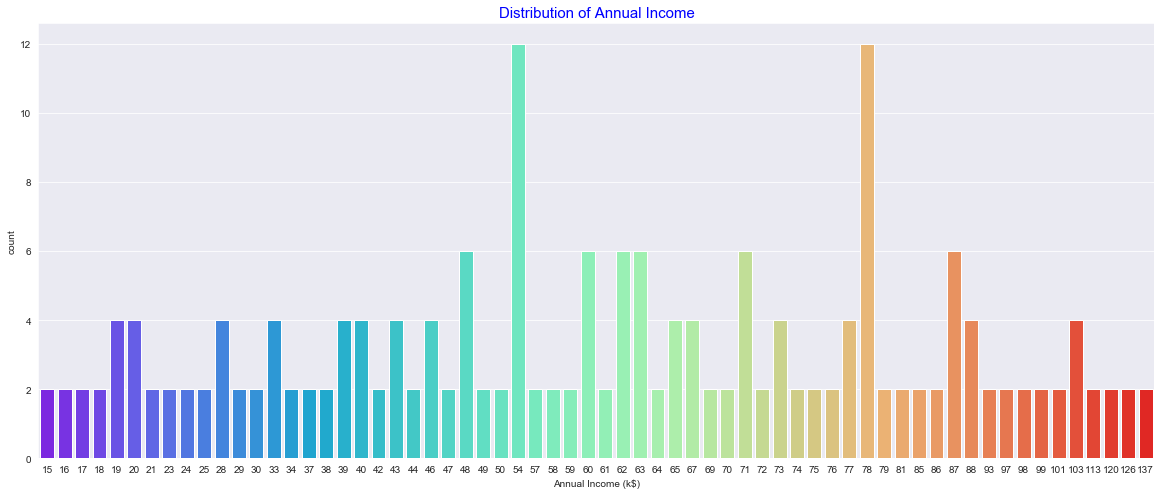

In [20]:
#Visualizing Annual Income 

plt.figure(figsize=(20, 8))
sns.countplot(dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 15, color = 'Blue')
plt.show()

Above chart represents the distribution of each income level. 

There are customers in the mall with a very much comparable frequency with their annual income ranging from 15 US Dollars to 137K US Dollars. There are more customers in the mall who have their annual income as 54k US Dollars or 78 US Dollars.

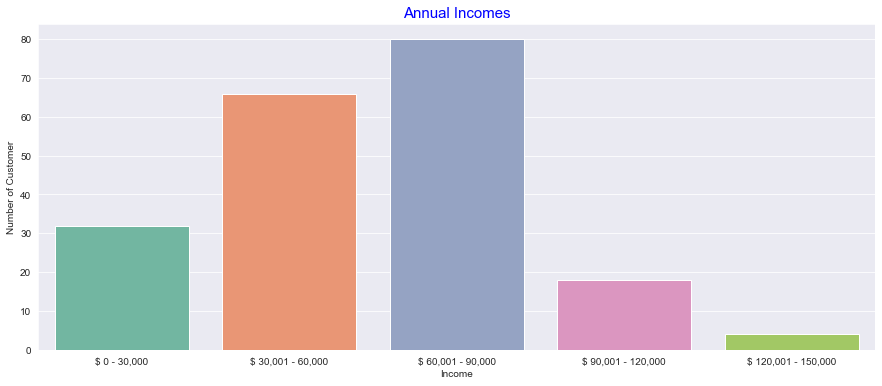

In [21]:
ai0_30 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 0) & (dataset["Annual Income (k$)"] <= 30)]
ai31_60 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 31) & (dataset["Annual Income (k$)"] <= 60)]
ai61_90 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 61) & (dataset["Annual Income (k$)"] <= 90)]
ai91_120 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 91) & (dataset["Annual Income (k$)"] <= 120)]
ai121_150 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 121) & (dataset["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes", fontsize = 15, color = 'Blue')
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Above chart represents number of customers according to their annual income. The majority of the customers have annual income in the range 60K - 90K US Dollors.

---

#### STEP 3 - BUILDING MODEL

##### Elbow Method

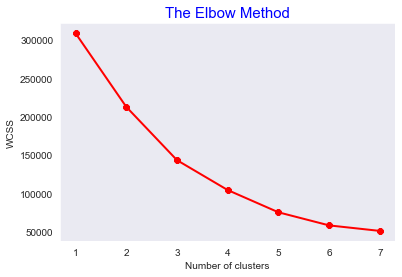

In [22]:
#We are plotting Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the
#optimal number of clusters value. 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1, 8), wcss, linewidth=2, color="red", marker ="8")
plt.title('The Elbow Method', fontsize = 15, color = 'Blue')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal K-value is found to be 5.

In [23]:
#Fitting the model

kmeans_new = KMeans(n_clusters = 5, random_state = 0).fit(dataset.iloc[:,1:])
kmeans_new

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [24]:
#Seeing Clusters Centre

kmeans_new.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

In [25]:
#Seeing Labels - It tells points belong to which cluster out of 5 cluster.

kmeans_new.labels_ 

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [38]:
y_kmeans = kmeans_new.predict(dataset.iloc[:,1:])
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [43]:
#X = dataset.iloc[:,1:]
X = dataset.iloc[:,1:].values

In [44]:
type(X)

numpy.ndarray

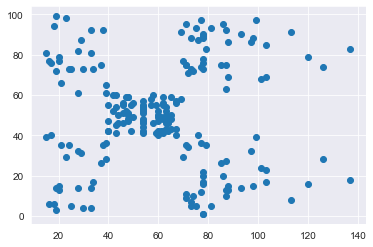

In [36]:
#Plotting scatter plot between Annual Income and Spending Score 

plt.scatter(x = dataset["Annual Income (k$)"], y = dataset["Spending Score (1-100)"])
plt.show()

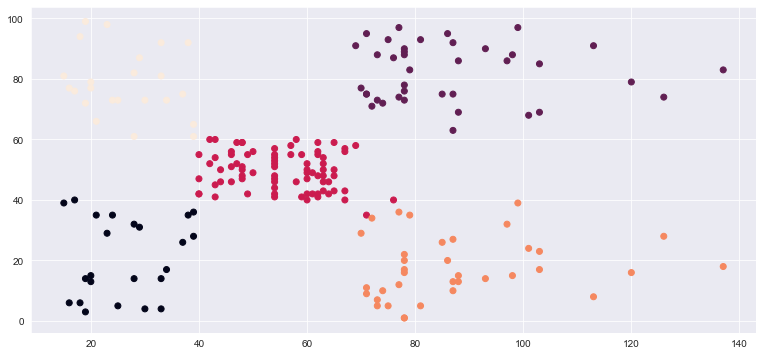

In [39]:
#Plotting scatter plot between Annula Income and Spending Score - With help of labels

plt.figure(figsize=(13,6))
plt.scatter(x = dataset["Annual Income (k$)"], y = dataset["Spending Score (1-100)"], c = y_kmeans)
plt.show()

In [40]:
type(y_kmeans)

numpy.ndarray

In [50]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [54]:
#Annual Salary of customers belonging to cluster 0

X[y_kmeans == 0, 1]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

In [55]:
#Spending Score of customers belonging to cluster 0

X[y_kmeans == 0, 2]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

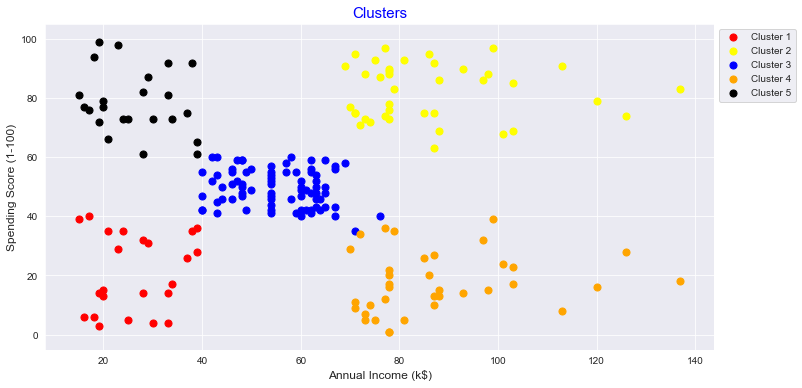

In [62]:
plt.figure(figsize = (12, 6))

plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 50, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 50, c = 'black', label = 'Cluster 5')

plt.title('Clusters', fontsize = 15, color = 'Blue')
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.show()

 * Analyzing the result

We can see that the mall customers can be broadly grouped into 5 clusters based on their purchases made in the mall.

>> 
In cluster 1(red colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less. The shops/mall will be least interested in people belonging to this cluster.

>>
In cluster 5(black colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

>>
In cluster 3(blue colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

>>
In cluster 2(yellow colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

>>
In cluster 4(orange colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, the mall authorities should target people belonging to cluster 3 and cluster 4 and should also maintain its standards to keep the people belonging to cluster 1 and cluster 5 happy and satisfied.